In [1]:
#Data processing packages
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

#Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 

#Stats packages
from scipy.stats import pointbiserialr
from scipy.stats import pearsonr, chi2_contingency, wilcoxon, friedmanchisquare, mannwhitneyu, kruskal, chi2_contingency
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind


In [3]:
dataset = pd.read_csv('general_data.csv')         #loading dataset
dataset.head()                                   #Checking first 5 rows

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
dataset.columns                                    #Columns Name

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
dataset.isnull()                                      #check for null values

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
dataset.isna()                                 #Check For NA values

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
dataset.dropna(axis= 0)                           # Dropping NA Values

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


In [9]:
dataset.duplicated()                        #Check for duplicate values
#There are no duplicate values in the dataset

0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool

In [11]:
dataset.describe()                       #This dataset includes both numeric and categorical values
#This function gives count,mean and standard deviation for the numerical variables

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [12]:
dataset.mean()                 #Calculate the average of all the variables

Age                           36.923810
DistanceFromHome               9.192517
Education                      2.912925
EmployeeCount                  1.000000
EmployeeID                  2205.500000
JobLevel                       2.063946
MonthlyIncome              65029.312925
NumCompaniesWorked             2.694830
PercentSalaryHike             15.209524
StandardHours                  8.000000
StockOptionLevel               0.793878
TotalWorkingYears             11.279936
TrainingTimesLastYear          2.799320
YearsAtCompany                 7.008163
YearsSinceLastPromotion        2.187755
YearsWithCurrManager           4.123129
dtype: float64

In [13]:
dataset.median()                   #Calculate the median of all the variables

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
EmployeeCount                  1.0
EmployeeID                  2205.5
JobLevel                       2.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
StandardHours                  8.0
StockOptionLevel               1.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [14]:
dataset.mode()                   #Calculate the mode of all the variables

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35.0,No,Travel_Rarely,Research & Development,2.0,3.0,Life Sciences,1.0,1,Male,...,1.0,Y,11.0,8.0,0.0,10.0,2.0,5.0,0.0,2.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4406,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4407,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4408,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4409,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dataset.var()                        #Calculate the Variance of all the variables

Age                        8.341719e+01
DistanceFromHome           6.569144e+01
Education                  1.048438e+00
EmployeeCount              0.000000e+00
EmployeeID                 1.621042e+06
JobLevel                   1.224760e+00
MonthlyIncome              2.215480e+09
NumCompaniesWorked         6.244436e+00
PercentSalaryHike          1.338907e+01
StandardHours              0.000000e+00
StockOptionLevel           7.257053e-01
TotalWorkingYears          6.056298e+01
TrainingTimesLastYear      1.661465e+00
YearsAtCompany             3.751728e+01
YearsSinceLastPromotion    1.037935e+01
YearsWithCurrManager       1.272582e+01
dtype: float64

In [16]:
dataset.skew()                                   #Calculate the skewness of all variables

Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
EmployeeCount              0.000000
EmployeeID                 0.000000
JobLevel                   1.024703
MonthlyIncome              1.368884
NumCompaniesWorked         1.026767
PercentSalaryHike          0.820569
StandardHours              0.000000
StockOptionLevel           0.968321
TotalWorkingYears          1.116832
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
dtype: float64

In [17]:
dataset.kurt()                        #Calculate the kurtosis of all the variables

Age                       -0.405951
DistanceFromHome          -0.227045
Education                 -0.560569
EmployeeCount              0.000000
EmployeeID                -1.200000
JobLevel                   0.395525
MonthlyIncome              1.000232
NumCompaniesWorked         0.007287
PercentSalaryHike         -0.302638
StandardHours              0.000000
StockOptionLevel           0.361086
TotalWorkingYears          0.912936
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x9fd6bf0>,
 'caps': [<matplotlib.lines.Line2D at 0x9fe4410>,
 'boxes': [<matplotlib.lines.Line2D at 0x9fd6bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x9fe4930>],
 'fliers': [<matplotlib.lines.Line2D at 0x9fe4b50>],
 'means': []}

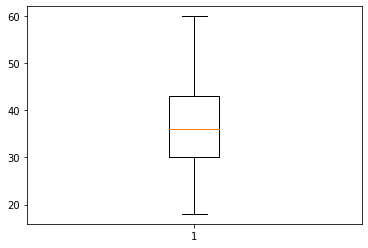

In [23]:
plt.boxplot(dataset.Age)
#plt.hist(dataset.Age)
#Age Variable looks like Normally Distributed and there are no Outliers in it

{'whiskers': [<matplotlib.lines.Line2D at 0x9d7f950>,
 'caps': [<matplotlib.lines.Line2D at 0x9d7ff30>,
 'boxes': [<matplotlib.lines.Line2D at 0x9d7f930>],
 'medians': [<matplotlib.lines.Line2D at 0x9d926d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x9d928f0>],
 'means': []}

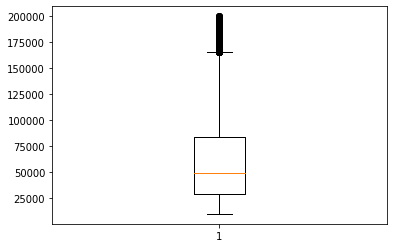

In [19]:
plt.boxplot(dataset.MonthlyIncome)
#DAta is not Normally Distributed and There are many outliers in Monthly Income Variable
#Most employees are from the salary between 50K and 75K

{'whiskers': [<matplotlib.lines.Line2D at 0x9df12b0>,
 'caps': [<matplotlib.lines.Line2D at 0x9df1750>,
 'boxes': [<matplotlib.lines.Line2D at 0x9dddf50>],
 'medians': [<matplotlib.lines.Line2D at 0x9df1c30>],
 'fliers': [<matplotlib.lines.Line2D at 0x9df1e50>],
 'means': []}

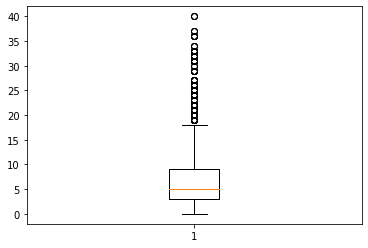

In [20]:
plt.boxplot(dataset.YearsAtCompany)
#Not distributed Normally and there are many outliers in it. 

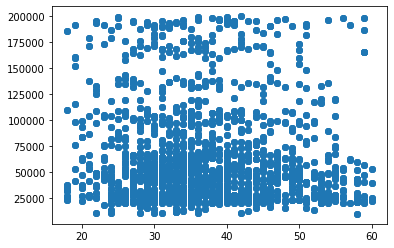

In [21]:
plt.scatter(dataset.Age,dataset.MonthlyIncome)

In [ ]:
#From the above plot, we can say that there is no correlation between Age and Monthly Income Variable

# Step 5

In [24]:
dataset1= dataset.replace(['Yes', 'No'], [1,0])     #Change the Attrition values in Binary
dataset1.head()
dataset2= dataset1.copy()

In [25]:
le=LabelEncoder()  #Encoding some categorical Variables
dataset2['BusinessTravel']=le.fit_transform(dataset2.BusinessTravel)
dataset2['DistanceFromHome']=le.fit_transform(dataset2.DistanceFromHome)

dataset2['Gender']=le.fit_transform(dataset2.Gender)

dataset2['MaritalStatus']=le.fit_transform(dataset2.MaritalStatus)

In [27]:
dataset2.head()
#Changed the Categorical data into Numeric

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,Sales,5,2,Life Sciences,1,1,0,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,1,Research & Development,9,1,Life Sciences,1,2,0,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,1,Research & Development,16,4,Other,1,3,1,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,0,Research & Development,1,5,Life Sciences,1,4,1,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,2,Research & Development,9,1,Medical,1,5,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [28]:
Att_yes= dataset[dataset1['Attrition']== 1]
Att_yes

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
13,47,Yes,Non-Travel,Research & Development,1,1,Medical,1,14,Male,...,1.0,Y,11,8,2,10.0,4,10,9,9
28,44,Yes,Travel_Frequently,Research & Development,1,2,Medical,1,29,Male,...,3.0,Y,14,8,1,19.0,2,1,0,0
30,26,Yes,Travel_Rarely,Research & Development,4,3,Medical,1,31,Male,...,2.0,Y,11,8,0,5.0,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,29,Yes,Travel_Rarely,Research & Development,7,1,Life Sciences,1,4382,Female,...,1.0,Y,21,8,0,4.0,2,4,0,1
4386,33,Yes,Travel_Rarely,Sales,11,4,Marketing,1,4387,Male,...,5.0,Y,21,8,0,8.0,2,5,0,4
4388,33,Yes,Travel_Rarely,Sales,1,3,Life Sciences,1,4389,Male,...,7.0,Y,11,8,0,13.0,2,9,1,7
4391,32,Yes,Travel_Rarely,Sales,23,1,Life Sciences,1,4392,Male,...,0.0,Y,11,8,0,4.0,2,3,1,2


In [29]:
Att_not= dataset[dataset1['Attrition']== 0]
Att_not

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


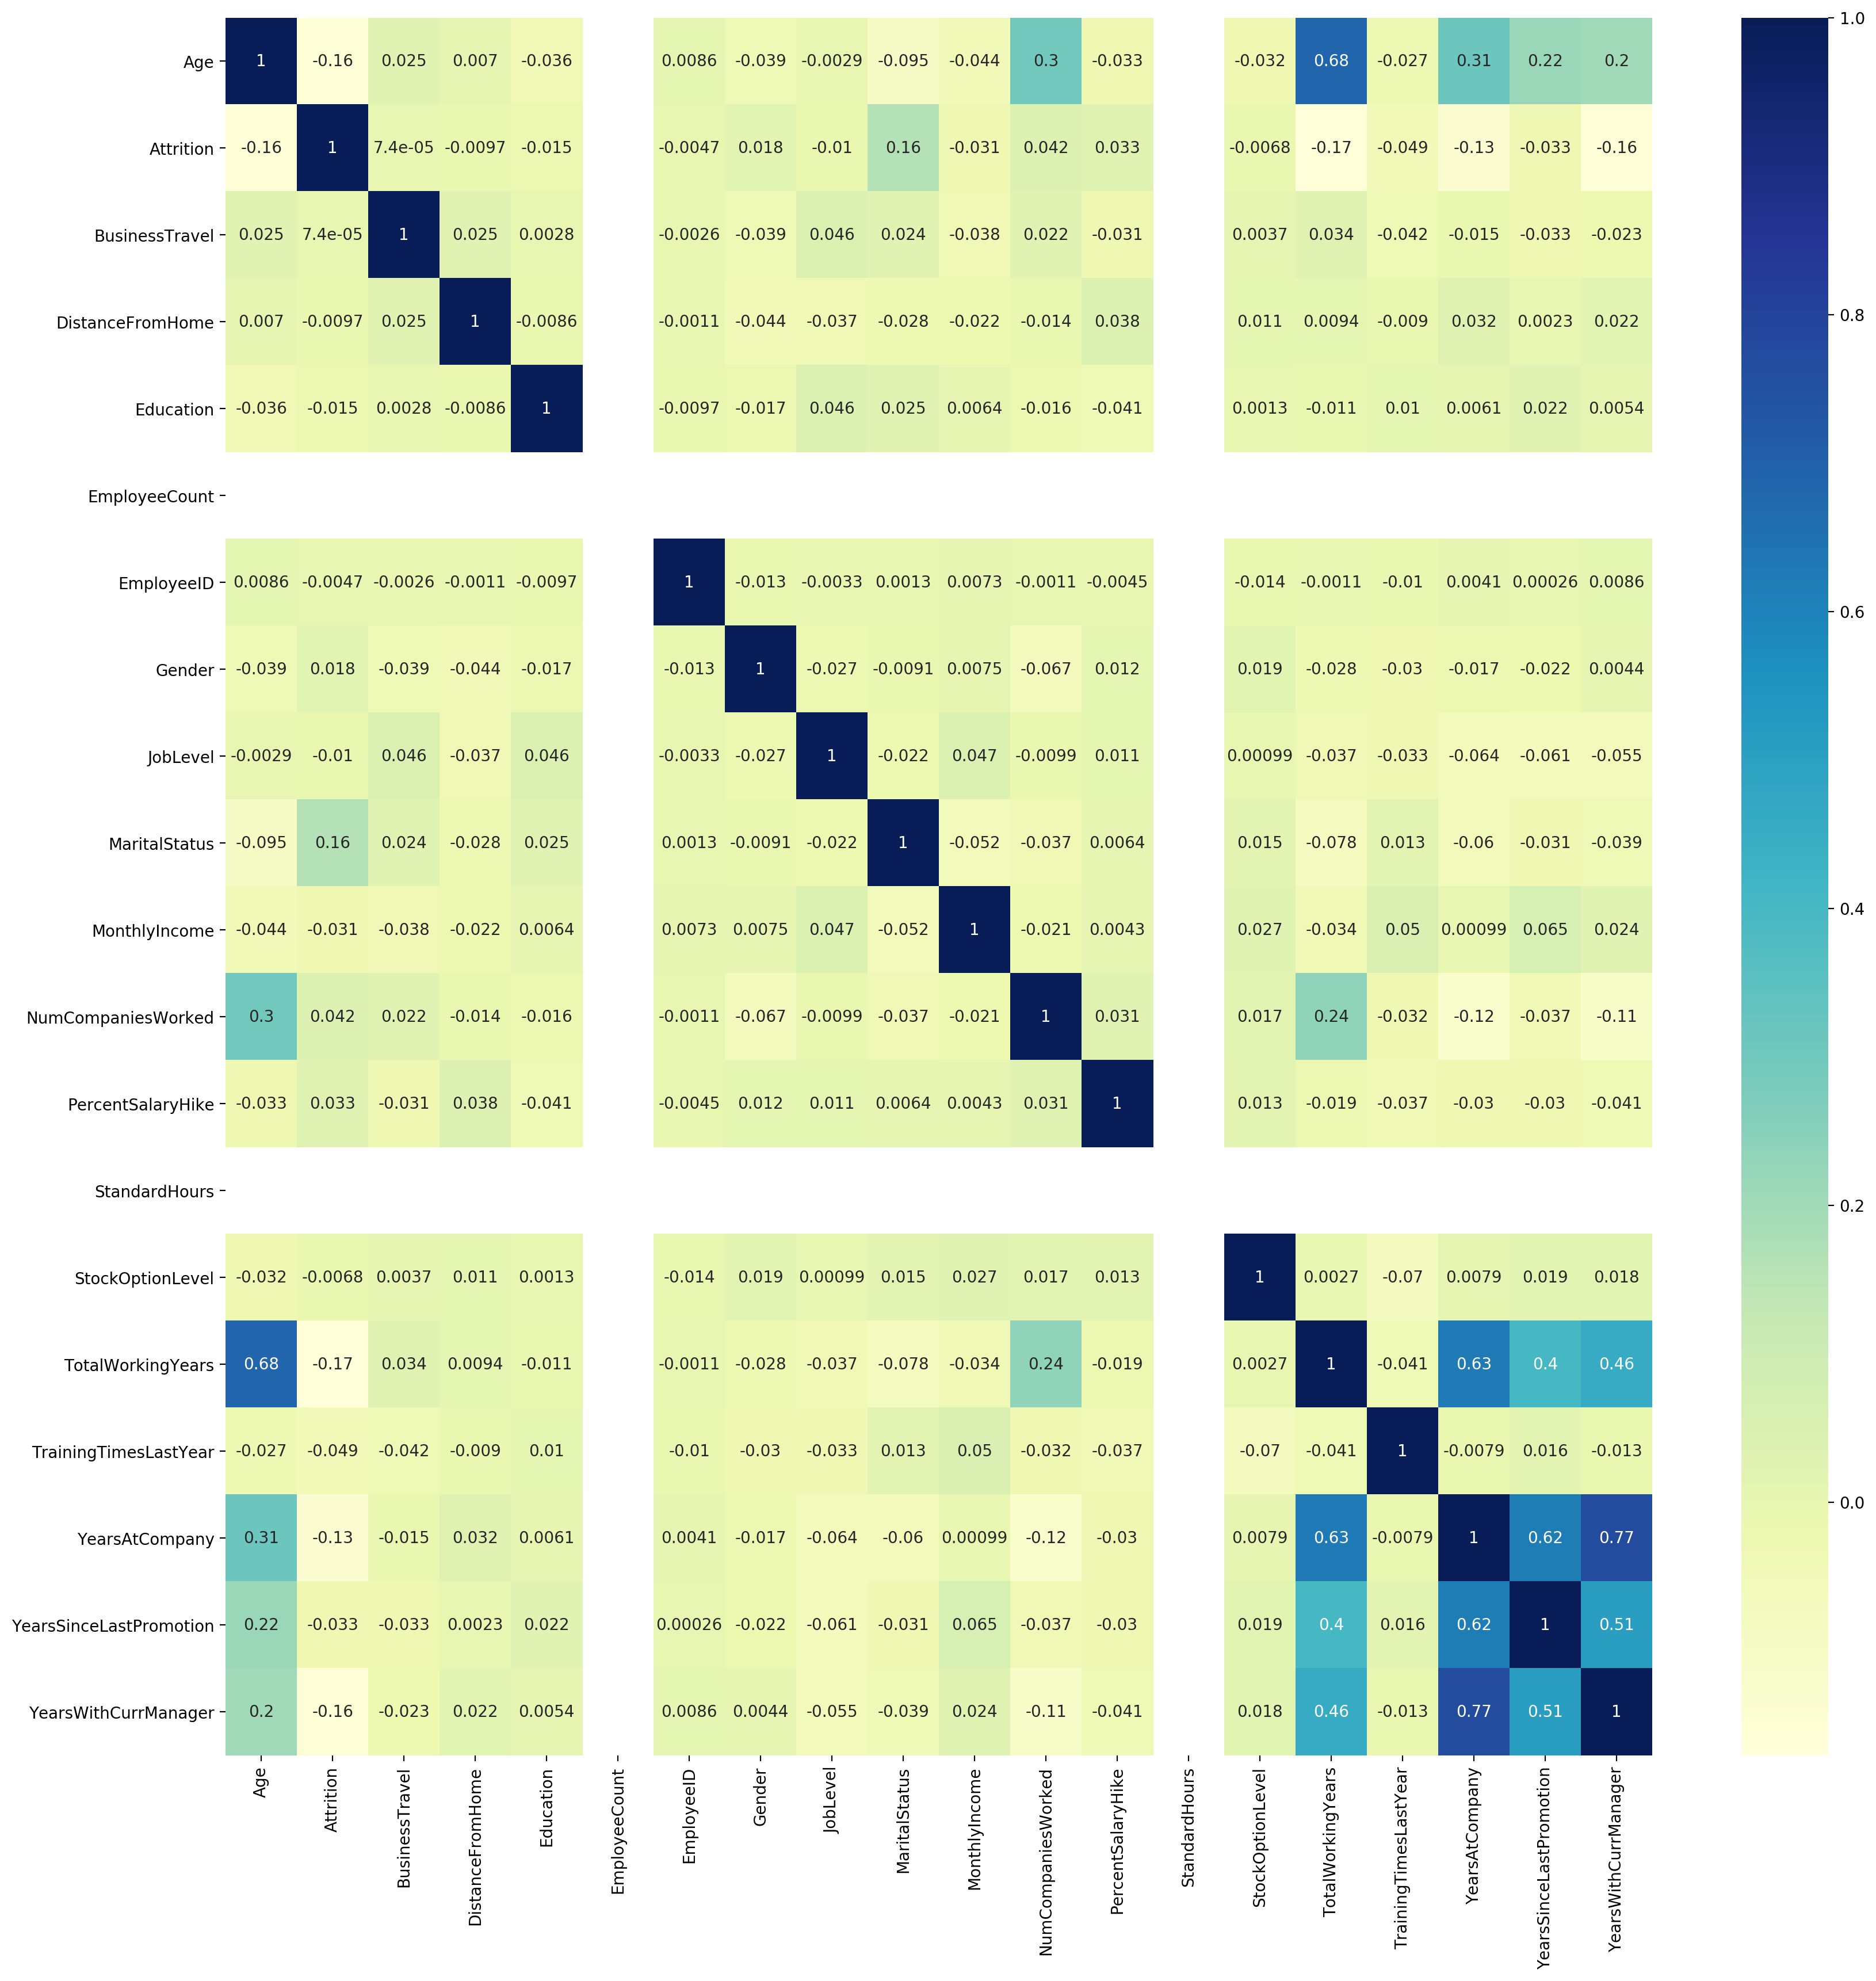

In [31]:
plt.figure(figsize= (20,20), dpi=200)
sns.heatmap(dataset2.corr(), annot=True, cmap="YlGnBu")

In [ ]:
#Statistical Test(Mann-Whitney)
#1. Attrition and Distance from home

In [40]:
stats, p = mannwhitneyu(Att_yes.DistanceFromHome, Att_not.DistanceFromHome)
print(f'The Value of p in mannwhitneyu test is: {p}')
if p < 0.05:
    print('There is significant impact in the Distance from Home between Attrition Y and Attrition N')
else:
    print('There is no significant impact in the Distance from Home between Attrition Y and Attrition N')

The Value of p in mannwhitneyu test is: 0.4629185205822659
There is no significant impact in the Distance from Home between Attrition Y and Attrition N


In [ ]:
#2. Attrition and Monthly Income

In [41]:
stats, p = mannwhitneyu(Att_yes.MonthlyIncome, Att_not.MonthlyIncome)
print(f'The Value of p in mannwhitneyu test is: {p}')
if p < 0.05:
    print('There is significant impact in the Monthly Income between Attrition Y and Attrition N')
else:
    print('There is no significant impact in the Monthly Income between Attrition Y and Attrition N')

The Value of p in mannwhitneyu test is: 0.053577283839938566
There is no significant impact in the Monthly Income between Attrition Y and Attrition N


In [ ]:
#3. Attrition and Total Working Years

In [42]:
stats, p = mannwhitneyu(Att_yes.TotalWorkingYears, Att_not.TotalWorkingYears)
print(f'The Value of p in mannwhitneyu test is: {p}')
if p < 0.05:
    print('There is significant impact in the Total working Hours between Attrition Y and Attrition N')
else:
    print('There is no significant impact in the Total working Hours between Attrition Y and Attrition N')

The Value of p in mannwhitneyu test is: 2.8897554531400447e-39
There is significant impact in the Total working Hours between Attrition Y and Attrition N


In [ ]:
#4. Attrition And Years at Company

In [43]:
stats, p = mannwhitneyu(Att_yes.YearsAtCompany, Att_not.YearsAtCompany)
print(f'The Value of p in mannwhitneyu test is: {p}')
if p < 0.05:
    print('There is significant impact in the Years at Company between Attrition Y and Attrition N')
else:
    print('There is no significant impact in the Years at Company between Attrition Y and Attrition N')

The Value of p in mannwhitneyu test is: 6.047598261692858e-37
There is significant impact in the Years at Company between Attrition Y and Attrition N


In [ ]:
#5. Attrition and Years with current manager

In [44]:
stats, p = mannwhitneyu(Att_yes.YearsWithCurrManager, Att_not.YearsWithCurrManager)
print(f'The Value of p in mannwhitneyu test is: {p}')
if p < 0.05:
    print('There is significant impact in the years with current Manager between Attrition Y and Attrition N')
else:
    print('There is no significant impact in the Years with current Manager between Attrition Y and Attrition N')

The Value of p in mannwhitneyu test is: 1.2365483142169853e-31
There is significant impact in the years with current Manager between Attrition Y and Attrition N


# Step 6
#Statistical Test(Seperate T test)
    

In [ ]:
#1. Attrition Vs Distance from Home

In [46]:
from scipy.stats import ttest_ind
stats, p = ttest_ind(Att_yes.DistanceFromHome, Att_not.DistanceFromHome)
print(f'The Value of p in t test is: {p}')
print(stats,p)
if p < 0.05:
    print('There is significant impact in the Distance from Home between Attrition Y and Attrition N')
else:
    print('There is no significant impact in the Distance from Home between Attrition Y and Attrition N')
    

The Value of p in t test is: 0.518286042805572
-0.6460416038042738 0.518286042805572
There is no significant impact in the Distance from Home between Attrition Y and Attrition N


In [ ]:
#2. Attrition Vs Monthly Income

In [45]:
from scipy.stats import ttest_ind
stats, p = ttest_ind(Att_yes.MonthlyIncome, Att_not.MonthlyIncome)
print(f'The Value of p in t test is: {p}')
if p < 0.05:
    print('There is significant impact in the Monthly Income  between Attrition Y and Attrition N')
else:
    print('There is no significant impact in the Monthly Income between Attrition Y and Attrition N')
    

The Value of p in t test is: 0.03842748490605113
There is significant impact in the Monthly Income  between Attrition Y and Attrition N


In [ ]:
#3. Attrition and Years at Company

In [47]:
from scipy.stats import ttest_ind
stats, p = ttest_ind(Att_yes.YearsAtCompany, Att_not.YearsAtCompany)
print(f'The Value of p in t test is: {p}')
if p < 0.05:
    print('There is significant impact in the YearsAtCompany  between Attrition Y and Attrition N')
else:
    print('There is no significant impact in the YearsAtCompany between Attrition Y and Attrition N')

The Value of p in t test is: 3.163883122491456e-19
There is significant impact in the YearsAtCompany  between Attrition Y and Attrition N


In [ ]:
#4. Attrition and Years with current manager

In [48]:
from scipy.stats import ttest_ind
stats, p = ttest_ind(Att_yes.YearsWithCurrManager, Att_not.YearsWithCurrManager)
print(f'The Value of p in t test is: {p}')
if p < 0.05:
    print('There is significant impact in the YearsWithCurrManager  between Attrition Y and Attrition N')
else:
    print('There is no significant impact in the YearsWithCurrManager between Attrition Y and Attrition N')

The Value of p in t test is: 1.7339322652918153e-25
There is significant impact in the YearsWithCurrManager  between Attrition Y and Attrition N


# Step 7

In [ ]:
# Correlation Analysis

In [ ]:
#1. Attrition Vs Distance From Home

In [50]:
#H0 = Attrition and Distance from Home have no correlation.
#Ha = Attrition and Distance from Home have correlation.
stats,p = pearsonr(dataset1.Attrition, dataset1.DistanceFromHome)
print("r= ", stats, " & p= ", p)
if p < 0.05:
    print('Ha Accepted :Attrition and Distance from Home have correlation. ')
else:
    print('Ho Accepted : Attrition and Distance from Home have no correlation.')

r=  -0.00973014101017969  & p=  0.5182860428050771
Ho Accepted : Attrition and Distance from Home have no correlation.


In [ ]:
#Here r value is low and negative so there is no correlation between Attrition and Distance from home

In [ ]:
#2. Attrition Vs Monthly Income

In [52]:
#H0 = Attrition and Monthly Income have no correlation.
#Ha = Attrition and Monthly Income have correlation.
stats,p = pearsonr(dataset1.Attrition, dataset1.MonthlyIncome)
print("r= ", stats, " & p= ", p)
if p < 0.05:
    print('Ha Accepted :Attrition and Monthly Income have correlation. ')
else:
    print('Ho Accepted : Attrition and Monthly Income have no correlation.')

r=  -0.031176281698115017  & p=  0.03842748490600132
Ha Accepted :Attrition and Monthly Income have correlation. 


In [ ]:
#Here r value is better and negative so there is correlation between Attrition and Montly Income

In [ ]:
#3. Attrition Vs Total Working Years

In [3]:
#H0 = Attrition and Total Working Years have no correlation.
#Ha = Attrition and Total Working Years have correlation.
from scipy.stats import pearsonr
stats,p = pearsonr(dataset1.Attrition, dataset1.TotalWorkingYears)
print("r= ", stats, " & p= ", p)
if p < 0.05:
    print('Ha Accepted :Attrition and Total Working Years have correlation. ')
else:
    print('Ho Accepted : Attrition andTotal Working Years have no correlation.')

NameError: name 'dataset1' is not defined

In [ ]:
#4. Attrition Vs Years at company

In [4]:
#H0 = Attrition and Years at company have no correlation.
#Ha = Attrition and Years at company have correlation.
from scipy.stats import pearsonr
stats,p = pearsonr(dataset1.Attrition, dataset1.YearsAtCompany)
print("r= ", stats, " & p= ", p)
if p < 0.05:
    print('Ha Accepted :Attrition and Years at company have correlation. ')
else:
    print('Ho Accepted : Attrition and Years at company have no correlation.')

NameError: name 'dataset1' is not defined

In [ ]:
#5. Attrition Vs Years with current Manager

In [ ]:
#H0 = Attrition and Years with current Manager have no correlation.
#Ha = Attrition and Years with current Manager have correlation.
from scipy.stats import pearsonr
stats,p = pearsonr(dataset1.Attrition, dataset1.YearsWithCurrManager)
print("r= ", stats, " & p= ", p)
if p < 0.05:
    print('Ha Accepted :Attrition and Years with current Manager have correlation. ')
else:
    print('Ho Accepted : Attrition and Years with current Manager have no correlation.')